In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import _autolag
from statsmodels.tsa.api import VAR
#from scipy.stats import pearsonr

DATA PREPARATION

In [20]:
data_df=pd.read_excel('Gas Data processed.xlsx',sheet_name="code_monthly")
df=data_df.loc[1:97,["months", "price_gas", "price_brent_gbp","price_brent_usd","open_interest_gas","lng","storage","temperature"]] 
print(df)

#first ets value at line 38

    months  price_gas  price_brent_gbp  price_brent_usd  open_interest_gas  \
1   Nov 09      29.57        46.579369            76.66              13795   
2   Dec 09      33.72        46.014033            74.46              12590   
3   Jan 10      38.77        47.677856            76.17              13650   
4   Feb 10      31.34        48.582063            73.75              12720   
5   Mar 10      29.71        51.917448            78.83              18530   
..     ...        ...              ...              ...                ...   
93  Jul 17      39.50        36.881168            48.48              73890   
94  Aug 17      44.91        40.013746            51.70              64090   
95  Sep 17      47.32        41.913182            56.15              48680   
96  Oct 17      50.38        43.527029            57.51              49696   
97  Nov 17      56.70        46.738375            62.71              51123   

         lng  storage  temperature  
1   1.270000   39.570     

In [21]:
#Vector:
dprice_gas=df.price_gas
dprice_brent_gbp=df.price_brent_gbp
dprice_brent_usd=df.price_brent_usd
dOI=df.open_interest_gas
dtemp=df.temperature
dstore=df.storage
dlng=df.lng


DataSeries=[dprice_gas,dprice_brent_usd,dOI,dstore,dlng]
df_test = pd.concat(DataSeries,axis=1)

In [22]:
######### INITIAL DATA TESTS #########

# stationarity describe an evolution following the same pattern overtime. Hence the relationship between variable are static
# stationarity test
# seasonality is not an issue as it can be predictable
# non linear trend can be corrected via applying a log
# take the difference to make the data stationary

from statsmodels.tsa.stattools import adfuller, kpss
######## NORMALITY TEST V2 ########

def normality_test_matrix(data, variables, test):    
    """Check normality test to comply with general model assumptions.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    test      : type of test to perform
    """

    col=['test statistic ','p-value ', 'lags used ']
    df = pd.DataFrame(np.zeros((len(variables), 3)), columns=col, index=variables)
    for r in df.index:
        if test == "Dickey-Fuller":
            dftestdickey = adfuller(data[r].values, autolag='AIC')
            for c in range(0,len(col)):
                df.loc[r, col[c]] = dftestdickey[c]           
        elif test == "KPSS":
            dftestkpss = kpss(data[r].values, regression='c', nlags="auto")
            for c in range(0,len(col)):
                df.loc[r, col[c]] = dftestkpss[c]

    print("Results for "+test+" test")
    df.columns = [var + test for var in col]

    #df.index = [var for var in variables]s
    return df


### styles ###

def highlight_cells_DF(series):
    highlight_true = 'background-color: green;'
    highlight_false = 'background-color: red;'
    default = ''
    return [highlight_true if e < 0.05 else highlight_false for e in series]  

def highlight_cells_KPSS(series):
    highlight_true = 'background-color: green;'
    highlight_false = 'background-color: red;'
    default = ''
    return [highlight_true if e > 0.05 else highlight_false for e in series]  


dfdifull = normality_test_matrix(df_test, variables = df_test.columns, test="Dickey-Fuller")
dfdifull.style.apply(highlight_cells_DF, subset=['p-value Dickey-Fuller'], axis=0)

Results for Dickey-Fuller test


,test statistic Dickey-Fuller,p-value Dickey-Fuller,lags used Dickey-Fuller
price_gas,-2.254967,0.186903,4.000000
price_brent_usd,-1.250542,0.651485,1.000000
open_interest_gas,-0.586572,0.873987,6.000000
storage,-2.797204,0.058674,1.000000
lng,-1.585644,0.490801,3.000000


In [23]:
dfkpss = normality_test_matrix(df_test, variables = df_test.columns, test="KPSS")
dfkpss.style.apply(highlight_cells_KPSS, subset=['p-value KPSS'], axis=0)

Results for KPSS test


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


,test statistic KPSS,p-value KPSS,lags used KPSS
price_gas,0.453926,0.053911,5.000000
price_brent_usd,0.990265,0.010000,5.000000
open_interest_gas,1.535099,0.010000,5.000000
storage,0.376294,0.087373,5.000000
lng,0.947150,0.010000,5.000000


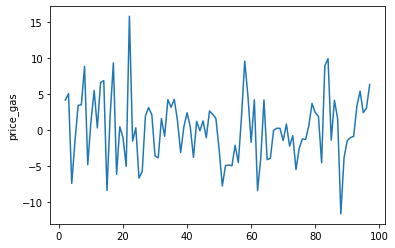

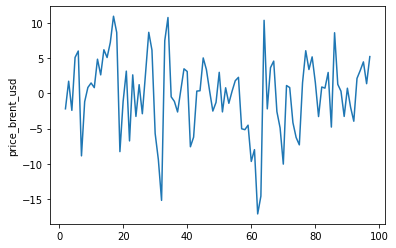

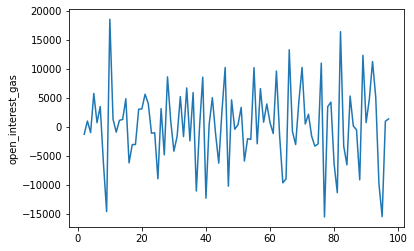

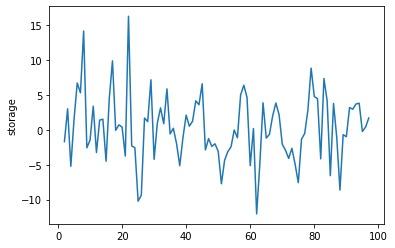

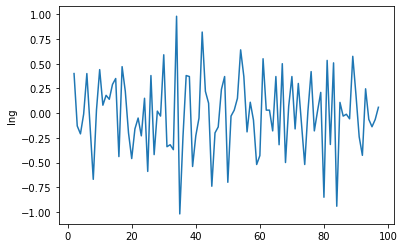

In [24]:
######### DATA CORRECTION #########
#ideally, for each set, apply specific changes
# detrending for linear processes
# differences for random walks 
# other ? non linear processes

#### differentiate 1
DataSeriesCorr=[]
for df in DataSeries:
    #if df.name == "open_interest_gas":
    #    df_log = pd.Series(np.log(df))
    #    df = df_log
    df_diff = df.diff().dropna()
    plt.plot(df_diff)
    plt.ylabel(df.name)
    plt.show()
    DataSeriesCorr.append(df_diff)

DataSeries = DataSeriesCorr

df_corr = pd.concat(DataSeriesCorr,axis=1)

In [25]:
######### STATIONARITY DATA TEST #########

# stationarity describe an evolution following the same pattern overtime. Hence the relationship between variable are static
# stationarity test
# seasonality is not an issue as it can be predictable
# non linear trend can be corrected via applying a log
# take the difference to make the data stationary


dfdifull = normality_test_matrix(df_corr, variables = df_corr.columns, test="Dickey-Fuller")
dfdifull.style.apply(highlight_cells_DF, subset=['p-value Dickey-Fuller'], axis=0)


Results for Dickey-Fuller test


,test statistic Dickey-Fuller,p-value Dickey-Fuller,lags used Dickey-Fuller
price_gas,-5.543970,0.000002,3.000000
price_brent_usd,-7.020566,0.000000,0.000000
open_interest_gas,-6.385508,0.000000,5.000000
storage,-5.497690,0.000002,7.000000
lng,-8.687176,0.000000,2.000000


In [26]:
dfkpss = normality_test_matrix(df_corr, variables = df_corr.columns, test="KPSS")
dfkpss.style.apply(highlight_cells_KPSS, subset=['p-value KPSS'], axis=0)

Results for KPSS test


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range

,test statistic KPSS,p-value KPSS,lags used KPSS
price_gas,0.140424,0.100000,1.000000
price_brent_usd,0.203020,0.100000,2.000000
open_interest_gas,0.136156,0.100000,26.000000
storage,0.116808,0.100000,3.000000
lng,0.082034,0.100000,10.000000


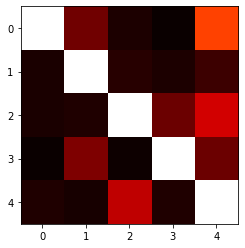

,price_gas_x,price_brent_usd_x,open_interest_gas_x,storage_x,lng_x
price_gas_y,1.0000,0.1546,0.0311,0.0016,0.4630
price_brent_usd_y,0.0272,1.0000,0.0462,0.0288,0.0753
open_interest_gas_y,0.0247,0.0342,1.0000,0.1473,0.2984
storage_y,0.0001,0.1726,0.0049,1.0000,0.1484
lng_y,0.0341,0.0224,0.2723,0.0330,1.0000


In [35]:
#### CORRECTED GRANGER CAUSALITY ####

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    plt.imshow(df, cmap='hot', interpolation='nearest')
    plt.show()
    return df


##### actual test
grangers_causation_matrix(df_corr, variables = df_corr.columns)        


In [28]:
def plot_gen(series):
    plt.figure(figsize=(12,6))
    plt.plot(series, color='red')
    plt.grid()
    plt.ylabel('Generation output (GWh)', fontsize=16)

def plot_price(series):
    plt.figure(figsize=(12,6))
    plt.plot(series, color='green')
    plt.grid()
    plt.ylabel('Price p/term', fontsize=16)

def plot_basic(series, name):
    plt.figure(figsize=(9,4))
    plt.plot(series)
    plt.ylabel(name, fontsize=10)
    plt.grid()


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


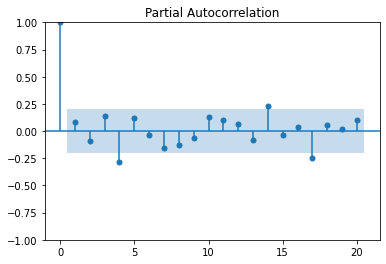

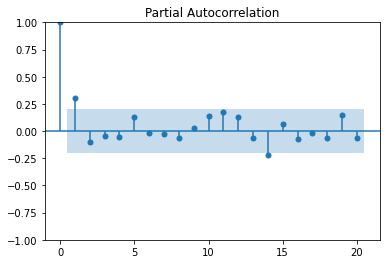

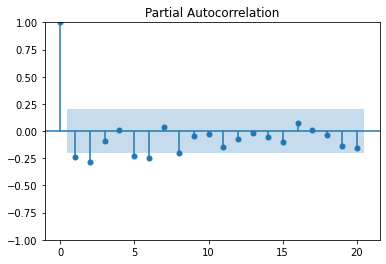

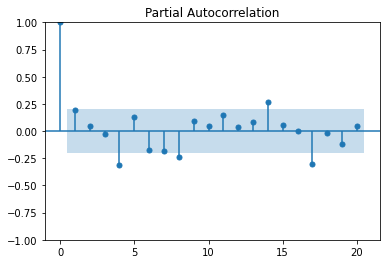

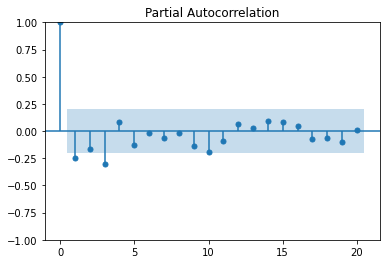

In [36]:
######### LAG LENGTH CRITERIA ######### either multiple of frequency or Schwarz, akaike, hannan-quinn, bayesian 

for df in DataSeries:
    plot_pacf(df)
    plt.show()



# for df in DataSeries:
#     lag_selection = _autolag(mod=VAR,endog=df, exog=df, startlag=1, maxlag=30, method="aic")
#     lag_selection.results()
#     #plt.show()




In [37]:
##### MODEL FITTING #####

model = VAR(df_corr)
x = model.select_order(maxlags=15)
x.summary()
#model_fit = model.fit(maxlags=10, ic="aic") #aic, or bic
#model_fit.summary()


#model_fit.plot()


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,24.24,24.38*,3.354e+10,24.30
1,23.95,24.83,2.512e+10,24.30
2,24.09,25.71,2.909e+10,24.74
3,23.85,26.22,2.352e+10,24.80
4,23.88,26.98,2.496e+10,25.13
5,23.67,27.51,2.139e+10,25.21
6,23.62,28.21,2.235e+10,25.46
7,23.79,29.11,3.001e+10,25.93
8,23.98,30.04,4.344e+10,26.41
9,23.74,30.54,4.386e+10,26.47


In [38]:
##### MODEL FITTING BASED ON LAG CRITERIA RESULTS ######

lag_order = 5
model_fit = model.fit(lag_order)
model_fit.summary()

#model_fit.plot()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jun, 2022
Time:                     17:18:25
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    27.6626
Nobs:                     91.0000    HQIC:                   25.5227
Log likelihood:          -1611.06    FPE:                3.10051e+10
AIC:                      24.0756    Det(Omega_mle):     8.82492e+09
--------------------------------------------------------------------
Results for equation price_gas
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.162035         0.484587            0.334           0.738
L1.price_gas                 0.026453         0.247080            0.107           0.915
L1.price_brent_usd          

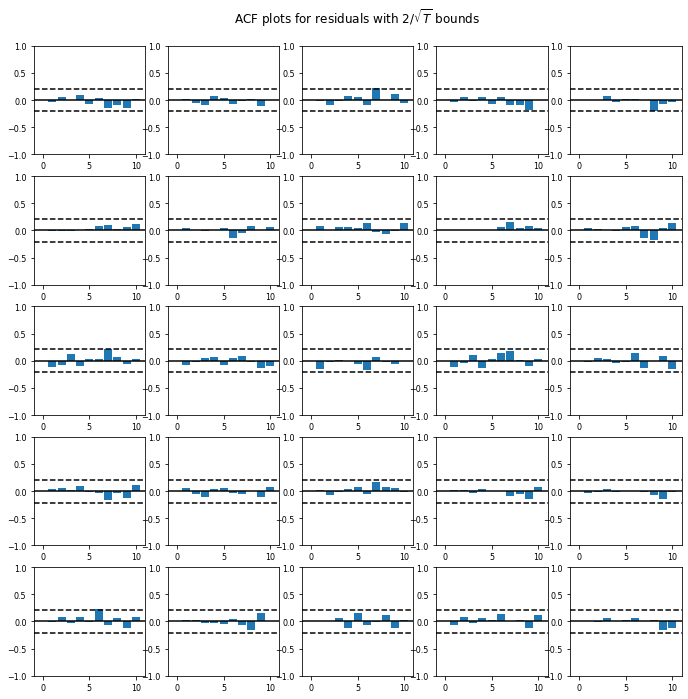

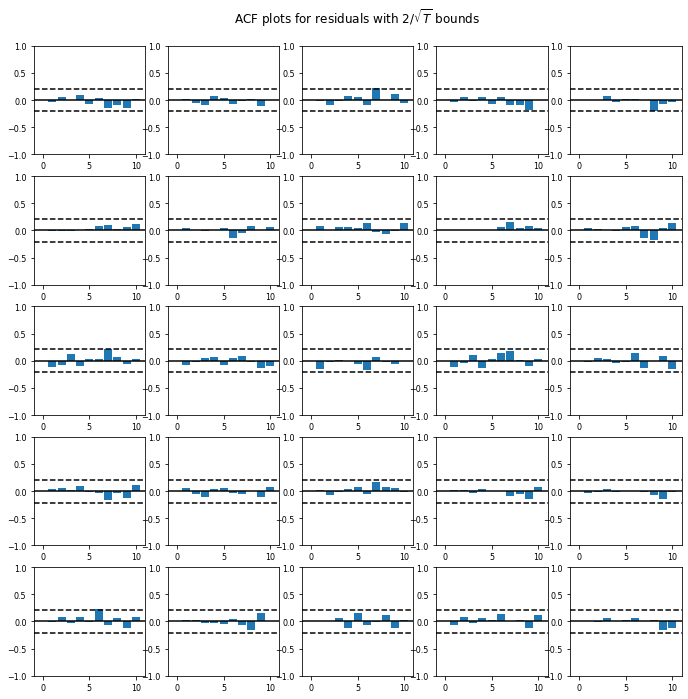

In [39]:
######### STABILITY RESIDUALS AUTOCORRELATION #########
model_fit.plot_acorr()

#if residuals out of range -> unstable model 

In [43]:
######### GRANGER CAUSALITY TEST #########
#for gas price
GrangerCausality = model_fit.test_causality('price_gas', ['storage'], kind='f')
print(GrangerCausality.summary())

#granger causality test : HO not rejected => there is some causality between the variables

#importance of the order: if p value higher, does it mean that one variable is generating the other ?

Granger causality F-test. H_0: storage does not Granger-cause price_gas. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         3.078          2.242   0.010 (5, 325)
----------------------------------------------


FEVD for price_gas
      price_gas  price_brent  open_interest_gas   storage       lng
0      1.000000     0.000000           0.000000  0.000000  0.000000
1      0.900489     0.076848           0.020491  0.000017  0.002155
2      0.859464     0.071868           0.021368  0.032901  0.014400
3      0.821893     0.075824           0.046552  0.041962  0.013769
4      0.798169     0.087575           0.048096  0.048544  0.017616
5      0.746293     0.082926           0.052147  0.090828  0.027805
6      0.745418     0.084078           0.053601  0.088863  0.028040
7      0.739304     0.089293           0.055147  0.088491  0.027765
8      0.736365     0.089909           0.056918  0.089130  0.027678
9      0.719829     0.090725           0.057149  0.105348  0.026949
10     0.711785     0.091164           0.058892  0.111491  0.026669
11     0.708952     0.090453           0.059184  0.112691  0.028721
12     0.707701     0.090353           0.060231  0.112477  0.029238
13     0.707059     0.090141 

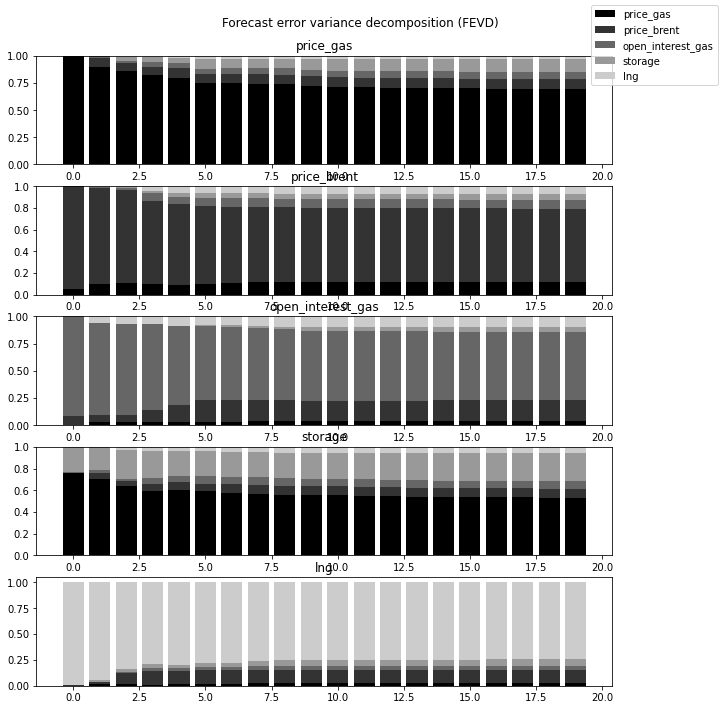

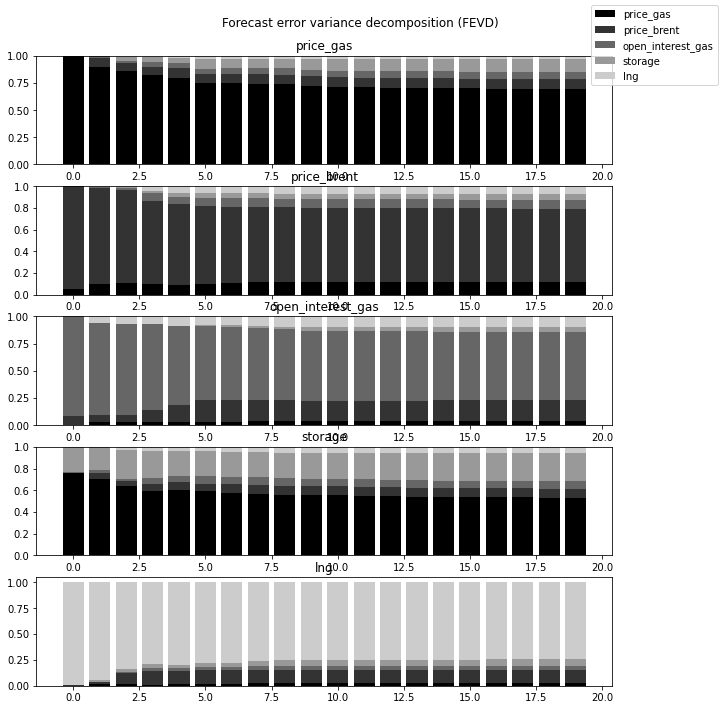

In [ ]:
######### FORECAST VARIANCE ERROR DECOMPOSITION: #########

#only for 20 periods
n=20
fevd = model_fit.fevd(n)
fevd.summary()


#affichage pour n périodes
model_fit.fevd(n).plot()

IMPULSE RESPONSE ANALYSIS:

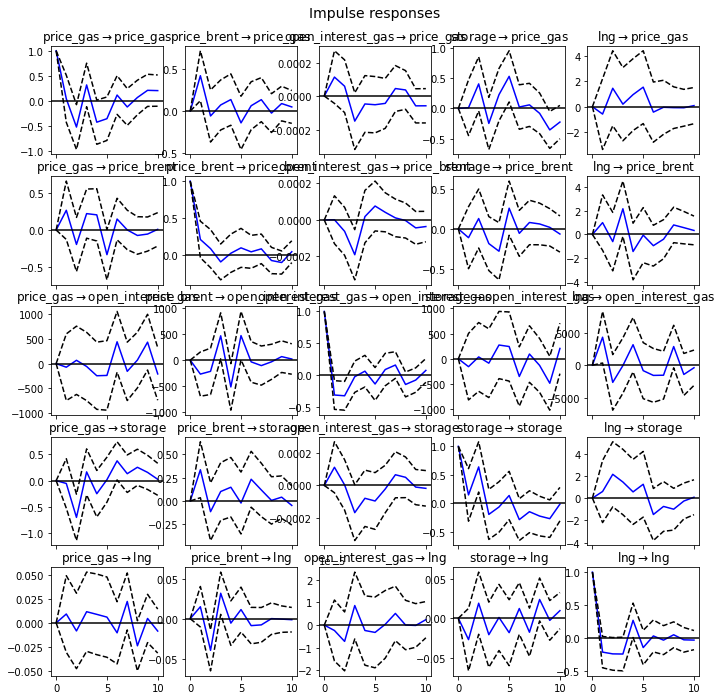

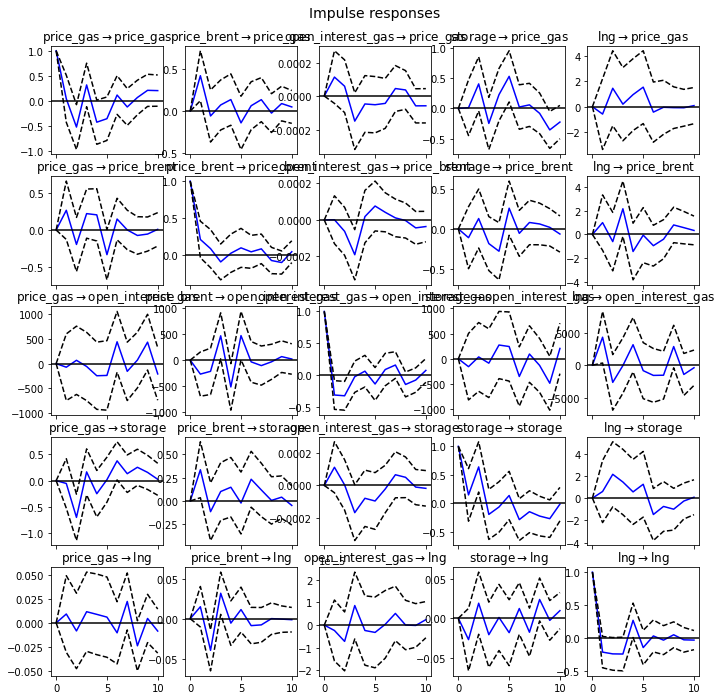

In [ ]:
irf = model_fit.irf(10)
irf.plot()

OTHER MODELS

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_corr['price_gas'], order=(0, 3, 3)) 
results_ARIMA = model.fit()

results_ARIMA.summary()
#results_ARIMA.forecast(3)[0]


#results_ARIMA.plot_predict(start=20)
#plt.show()

/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              price_gas   No. Observations:                   96
Model:                 ARIMA(0, 3, 3)   Log Likelihood                -307.704
Date:                Mon, 27 Jun 2022   AIC                            623.409
Time:                        17:05:13   BIC                            633.539
Sample:                             0   HQIC                           627.499
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.3213     57.999     -0.040      0.968    -115.996     111.354
ma.L2          1.7932     85.002      0.021      0.983    -164.808     168.395
ma.L3         -0.4164     25.303     -0.016      0.987     -50.010      49.177
sigma2        38.4099   2340.568      0.016      0.987   -4549.020    4625.839
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 6.12
Prob(Q):                              0.78   Prob(JB):                         0.05
Heteroskedasticity (H):               0.62   Skew:                            -0.28
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""